In [28]:
import pandas as pd
mlb = pd.read_csv('mlb.csv')
print(mlb.head())
print(mlb.shape)

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
(1034, 6)


In [29]:
print(mlb.describe())

            height       weight          age
count  1034.000000  1033.000000  1034.000000
mean     73.697292   201.689255    28.736712
std       2.305818    20.991491     4.320310
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.925000
75%      75.000000   215.000000    31.232500
max      83.000000   290.000000    48.520000


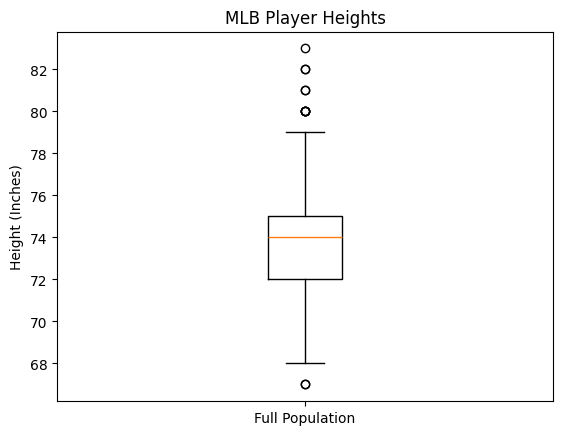

In [30]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height']])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1], ['Full Population'])
plt.show()

In [31]:
sample1=mlb.sample(n=30,random_state=8675309)
sample2=mlb.sample(n=30,random_state=1729)

In [32]:
sample3=[71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75,\
76, 76, 75, 75, 81,77, 75, 77, 75, 77, 77, 75, 75]

In [33]:
sample1

,name,team,position,height,weight,age
622,Brandon_Phillips,CIN,Second_Baseman,71,185.0,25.67
682,Manny_Corpas,COL,Relief_Pitcher,75,170.0,24.24
561,Tony_Clark,ARZ,First_Baseman,79,245.0,34.71
687,Jeremy_Affeldt,COL,Relief_Pitcher,76,215.0,27.73
75,Howie_Kendrick,ANA,First_Baseman,70,180.0,23.64
379,David_Riske,KC,Relief_Pitcher,74,190.0,30.35
473,Boof_Bonser,MIN,Starting_Pitcher,76,260.0,25.38
568,Carlos_Quentin,ARZ,Outfielder,73,225.0,24.51
8,Aubrey_Huff,BAL,Third_Baseman,76,231.0,30.19
444,Jean_Machi,TOR,Relief_Pitcher,72,160.0,24.08


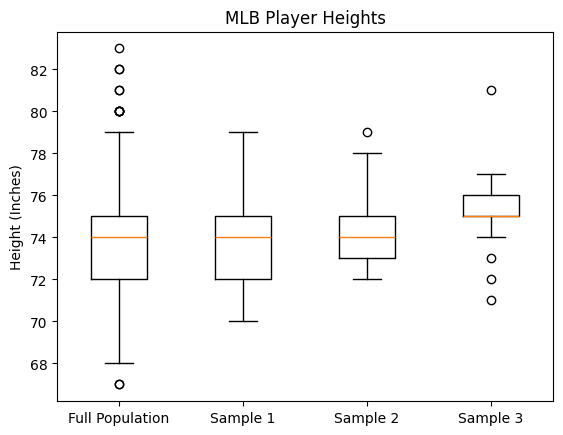

In [34]:
import numpy as np
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height'],sample1['height'],sample2['height'],np.array(sample3)])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1,2,3,4], ['Full Population','Sample 1','Sample 2','Sample 3'])
plt.show()

In [35]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))

73.8
74.36666666666666
75.43333333333334


In [36]:
alldifferences=[]
for i in range(1000):
    newsample1=mlb.sample(n=30,random_state=i*2)
    newsample2=mlb.sample(n=30,random_state=i*2+1)
    alldifferences.append(newsample1['height'].mean()-newsample2['height'].mean())
print(alldifferences[0:10])

[0.8333333333333286, -0.30000000000001137, -0.10000000000000853, -0.1666666666666572, 0.06666666666667709, -0.9666666666666686, 0.7999999999999972, 0.9333333333333371, -0.5333333333333314, -0.20000000000000284]


/var/folders/f1/6q1lvqh56gqghd_wxbgcsyxc0000gn/T/ipykernel_51503/2366243221.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(alldifferences).set_title("Differences Between Sample Means")


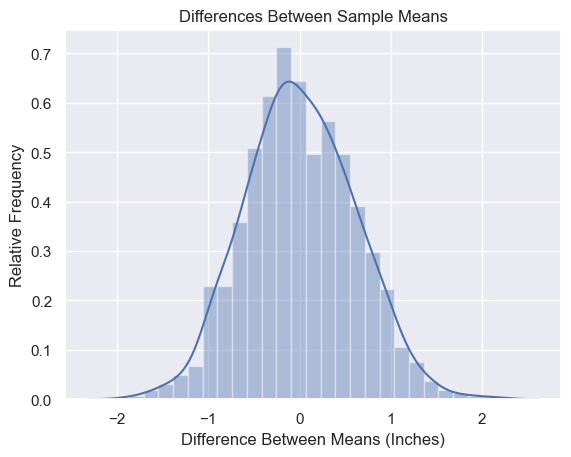

In [37]:
import seaborn as sns
sns.set()
ax=sns.distplot(alldifferences).set_title("Differences Between Sample Means")
plt.xlabel('Difference Between Means (Inches)')
plt.ylabel('Relative Frequency')
plt.show()

In [38]:
largedifferences=[diff for diff in alldifferences if abs(diff)>=1.6]
print(len(largedifferences))

8


In [39]:
smalldifferences=[diff for diff in alldifferences if abs(diff)>=0.6]
print(len(smalldifferences))

314


In [40]:
import scipy.stats
scipy.stats.ttest_ind(sample1['height'],sample2['height'])

TtestResult(statistic=-1.0839563860213952, pvalue=0.28286958923051514, df=58.0)

In [44]:
scipy.stats.mannwhitneyu(sample1['height'],sample2['height'])

MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)

In [45]:
desktop=pd.read_csv('desktop.csv')
laptop=pd.read_csv('laptop.csv')

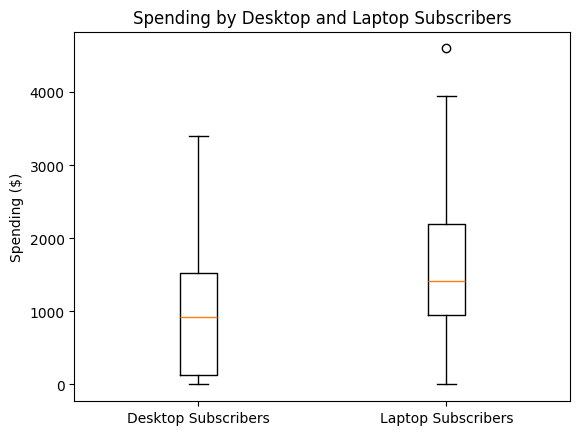

In [46]:
import matplotlib.pyplot as plt
sns.reset_orig()
fig1, ax1 = plt.subplots()
ax1.set_title('Spending by Desktop and Laptop Subscribers')
ax1.boxplot([desktop['spending'].values,laptop['spending'].values])
ax1.set_ylabel('Spending ($)')
plt.xticks([1,2], ['Desktop Subscribers','Laptop Subscribers'])
plt.show()

In [47]:
print(np.mean(desktop['age']))
print(np.mean(laptop['age']))
print(np.median(desktop['age']))
print(np.median(laptop['age']))
print(np.quantile(laptop['spending'],.25))
print(np.quantile(desktop['spending'],.75))
print(np.std(desktop['age']))

35.766666666666666
38.733333333333334
32.0
33.0
957.5
1528.25
14.943634839697543


In [48]:
scipy.stats.ttest_ind(desktop['spending'],laptop['spending'])

TtestResult(statistic=-2.109853741030508, pvalue=0.03919630411621093, df=58.0)